# Notebook Tarea Churn
### El objetivo de esta notebook es guiarlos en la tarea churn

##### 1) Importar bibliotecas necesarias (Pandas, Numpy, Sklearn)

In [1]:
import pandas
import numpy
import sklearn

##### 2) Cargar dataset a un Pandas Dataframe (TelcoChurn.zip)
###### Link datos: https://aulas.ort.edu.uy/pluginfile.php/322705/mod_assign/intro/TelcoChurn.zip
###### Link documentación: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
dataframe = pandas.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#dataframe

In [3]:
dataframe.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### 3) Hacer plotting de variable target (churn vs not churn) :

###### Link Documentación plot: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
###### Link Documentación value_counts: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html


In [4]:
import matplotlib.pyplot as plt
prevalence = dataframe['Churn'].value_counts()
prevalence.plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

##### 4) Identificar variables numéricas y categoricas, plotearlas :
- Plotear frecuencia de categoricas
- Plotear histograma de numéricas

###### Link Documentación plot: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
###### Link Documentación hist: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

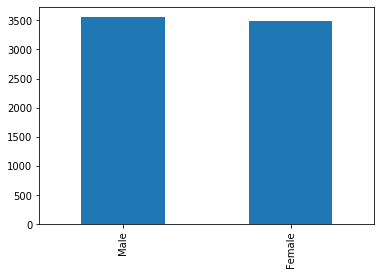

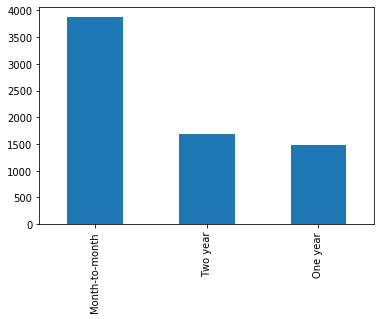

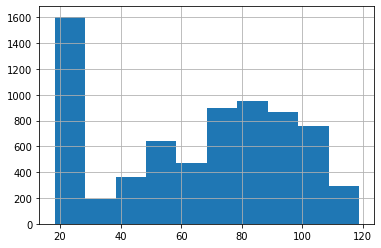

In [5]:
gender = dataframe['gender'].value_counts()
gender.plot(kind='bar')
plt.show()

contract = dataframe['Contract'].value_counts()
contract.plot(kind='bar')
plt.show()

charges = dataframe['MonthlyCharges']
charges.hist()


##### 5) Preprocesamiento:
- Remover datos faltantes
- Encoding de variables categóricas

In [6]:
len(dataframe)

7043

In [7]:
dataframe = dataframe.dropna(axis = 1)
#dataframe = dataframe.dropna(axis = 0)

In [8]:
len(dataframe)

7043

In [9]:

c_gender = 'gender' 
c_senior_citizen = 'SeniorCitizen'
c_partner = 'Partner'
c_dependents = 'Dependents'
c_tenure = 'tenure'
c_phone_service = 'PhoneService'
c_multiple_lines ='MultipleLines'
c_internet_service = 'InternetService'
c_online_security = 'OnlineSecurity'
c_online_backup = 'OnlineBackup'
c_device_protection ='DeviceProtection'
c_tech_support ='TechSupport'
c_streaming_tv = 'StreamingTV'
c_streaming_moves = 'StreamingMovies'
c_contract ='Contract'
c_paperless_billing ='PaperlessBilling'
c_payment_method = 'PaymentMethod'
c_monthly_charges ='MonthlyCharges'
c_total_charges = 'TotalCharges'
c_churn ='Churn'

categorical_features = [c_gender, c_senior_citizen, c_partner, c_dependents, c_phone_service,
            c_multiple_lines,c_internet_service,c_online_security, c_online_backup, c_device_protection,
            c_tech_support, c_streaming_tv,c_streaming_moves, c_contract, c_paperless_billing,c_payment_method]

numeric_features = [c_tenure, c_monthly_charges, c_total_charges]

In [10]:
dataframe['tenure'] = dataframe['tenure'].astype(float)

from sklearn.preprocessing import LabelEncoder

encoded_features = []

for feature in categorical_features:
    label_encoder_contract = LabelEncoder()
    label_encoder_contract.fit(dataframe[feature])
    dataframe[feature+'_encoded'] = label_encoder_contract.transform(dataframe[feature])
    encoded_features.append(feature+'_encoded')
    
predictor_features = encoded_features + numeric_features

proyeccion_data = dataframe[[c_gender,c_gender+'_encoded' ]]
proyeccion_data
#Machine Learning Yearning - Andrew Ng
#sklearn tiene preprocesing-Encoding para encodear las variables categoricas

,gender,gender_encoded
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0
5,Female,0
6,Male,1
7,Female,0
8,Female,0
9,Male,1


#####  6) Particionar en Train - Test

###### Link Documentación sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
dataframe[c_total_charges] = pandas.to_numeric(dataframe[c_total_charges], errors='coerce')
errors = dataframe[dataframe[c_total_charges] != dataframe[c_total_charges]]
errors[c_total_charges]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [12]:
dataframe.dropna(axis = 0, inplace = True)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe[predictor_features],dataframe[c_churn], test_size = 0.33)

#####  7) Entrenar modelo (usando Train):
- Sklearn CART implementation
- Parametros a optimizar: criterion, max_depth, min_sample_split
###### Link Documentación sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

 8) Evaluar modelo (usando Test)


 Link Documentación accuracy : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
 Link Documentación confusion matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 Link Documentación classification report : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [15]:
y_predict = clf.predict(X_test)
y_predict

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [16]:
from sklearn.metrics import accuracy_score
error = accuracy_score(y_test,y_predict)
error

0.7285652735889703

##### 9) Implementar C4.5 en archivo '.py' aparte e importarlo
- Metodos: fit, predict, export_graph_viz

In [17]:
from C45 import C45 

tree = C45()
tree.fit(X_train, y_train, 5)
y_predict = tree.predict(X_test)
y_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

#####  10) Entrenar modelo (usando Train):
- C4.5 own implementation
- Optimizar parámetros: max_deph, min_samples_leaf, min_gain_split

In [18]:
error = accuracy_score(y_test,y_predict)
error

0.7828522188711762

##### 11) Evaluar modelo (usando Test) y comparar con modelo del punto 8

